In [127]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
train.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [2]:
train.shape

(50882, 14)

In [47]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [9]:
test.shape

(21805, 13)

In [10]:
sample.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,1


In [11]:
sample.shape

(21805, 2)

In [48]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [128]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1,2,3,4,5,6,7,8,9,10
City_Code,C3,C5,C5,C24,C8,C9,C3,C1,C15,C1
Region_Code,3213,1117,3732,4378,2190,1785,679,3175,3497,530
Accomodation_Type,Rented,Owned,Owned,Owned,Rented,Rented,Owned,Owned,Owned,Owned
Reco_Insurance_Type,Individual,Joint,Individual,Joint,Individual,Individual,Individual,Joint,Joint,Joint
Upper_Age,36,75,32,52,44,52,28,75,52,59
Lower_Age,36,22,32,48,44,52,28,73,43,26
Is_Spouse,No,No,No,No,No,No,No,Yes,No,Yes
Health Indicator,X1,X2,NaN,X1,X2,X2,NaN,X4,X1,NaN
Holding_Policy_Duration,14+,NaN,1.0,14+,3.0,5.0,NaN,9.0,14.0,7.0


In [129]:
for col in train.select_dtypes(include=['object']).columns:
    unique_vals = train[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'City_Code' (36 unique values):
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
--------------------------------------------------
Column 'Accomodation_Type' (2 unique values):
['Rented' 'Owned']
--------------------------------------------------
Column 'Reco_Insurance_Type' (2 unique values):
['Individual' 'Joint']
--------------------------------------------------
Column 'Is_Spouse' (2 unique values):
['No' 'Yes']
--------------------------------------------------
Column 'Health Indicator' (9 unique values):
['X1' 'X2' 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
--------------------------------------------------
Column 'Holding_Policy_Duration' (15 unique values):
['14+' '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
--------------------------------------------------


In [130]:
for col in train.columns:

    nan_count = train[col].isna().sum()
    total_missing= nan_count
    if total_missing:
        print(f"Column '{col}':  NaN = {nan_count}, Total missing = {total_missing}")

Column 'Health Indicator':  NaN = 11691, Total missing = 11691
Column 'Holding_Policy_Duration':  NaN = 20251, Total missing = 20251
Column 'Holding_Policy_Type':  NaN = 20251, Total missing = 20251


In [131]:
missing_proportions = train.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing ")


Column 'Health Indicator': 22.98% missing 
Column 'Holding_Policy_Duration': 39.80% missing 
Column 'Holding_Policy_Type': 39.80% missing 


In [132]:
train_drop = train.drop(['Holding_Policy_Duration','Holding_Policy_Type'], axis=1,inplace = True)


In [133]:
train.shape

(50882, 12)

In [134]:
train[['Lower_Age', 'Upper_Age']].describe()
train[['Lower_Age', 'Upper_Age']].corr()


,Lower_Age,Upper_Age
Lower_Age,1.000000,0.921392
Upper_Age,0.921392,1.000000


In [135]:

def combine_edges(row):
    if row['Upper_Age'] == row['Lower_Age']:
        return row['Upper_Age']
    else:
        return max(row['Upper_Age'], row['Lower_Age'])

train['Age'] = train.apply(combine_edges, axis=1)
train = train.drop(['Upper_Age', 'Lower_Age'], axis=1)

train.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response,Age
0,1,C3,3213,Rented,Individual,No,X1,22,11628.0,0,36
1,2,C5,1117,Owned,Joint,No,X2,22,30510.0,0,75
2,3,C5,3732,Owned,Individual,No,NaN,19,7450.0,1,32
3,4,C24,4378,Owned,Joint,No,X1,19,17780.0,0,52
4,5,C8,2190,Rented,Individual,No,X2,16,10404.0,0,44


In [136]:

cols = ['Health Indicator']
for col in cols:
    train[col].fillna('Unknown', inplace=True)
print(train.isna().sum())


ID                     0
City_Code              0
Region_Code            0
Accomodation_Type      0
Reco_Insurance_Type    0
Is_Spouse              0
Health Indicator       0
Reco_Policy_Cat        0
Reco_Policy_Premium    0
Response               0
Age                    0
dtype: int64


/tmp/ipython-input-100836038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('Unknown', inplace=True)


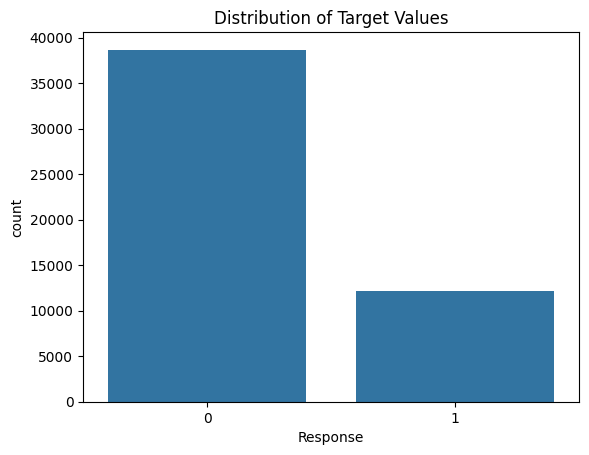

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "Response", data = train)
plt.title("Distribution of Target Values")
plt.show()


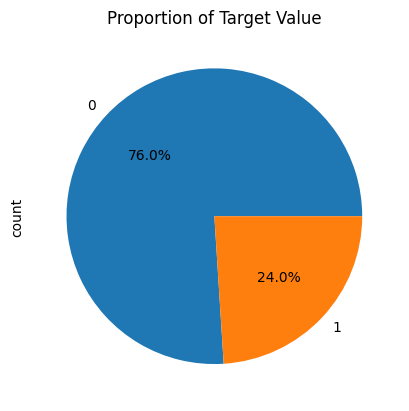

In [59]:
train.Response.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

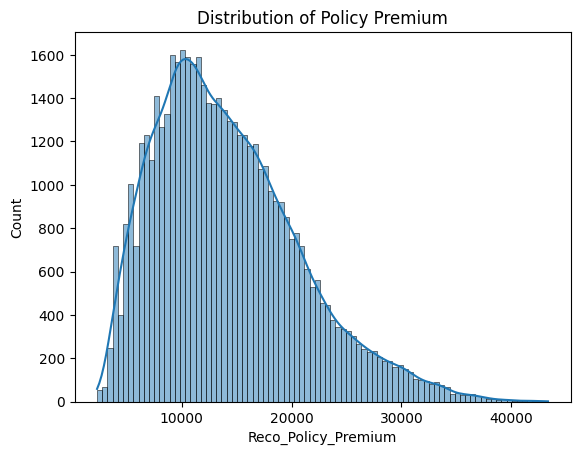

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['Reco_Policy_Premium'], kde=True)
plt.title('Distribution of Policy Premium')
plt.show()




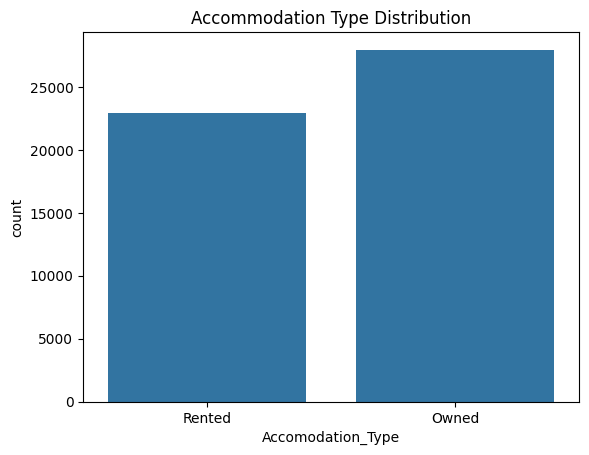

In [111]:
sns.countplot(x='Accomodation_Type', data=train)
plt.title('Accommodation Type Distribution')
plt.show()


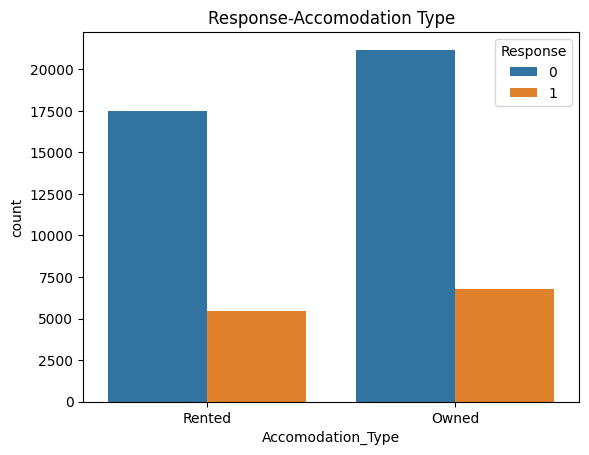

In [67]:
sns.countplot(x="Accomodation_Type", hue= "Response", data = train)
plt.title("Response-Accomodation Type")
plt.show()

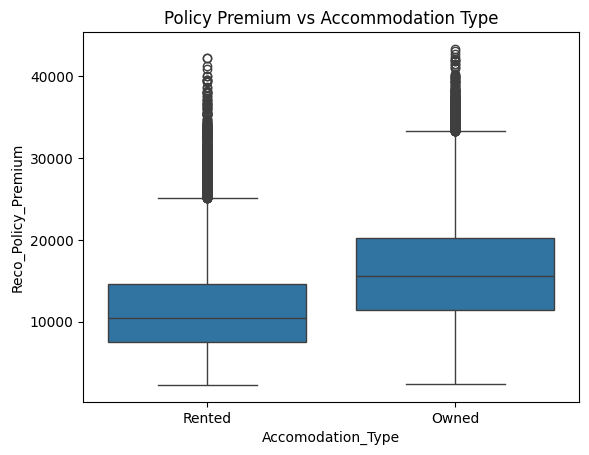

In [68]:
sns.boxplot(x='Accomodation_Type', y='Reco_Policy_Premium', data=train)
plt.title('Policy Premium vs Accommodation Type')
plt.show()


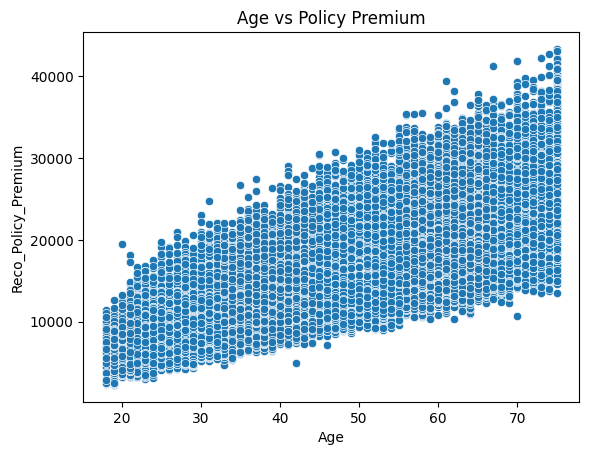

In [104]:
sns.scatterplot(x='Age', y='Reco_Policy_Premium', data=train)
plt.title('Age vs Policy Premium')
plt.show()


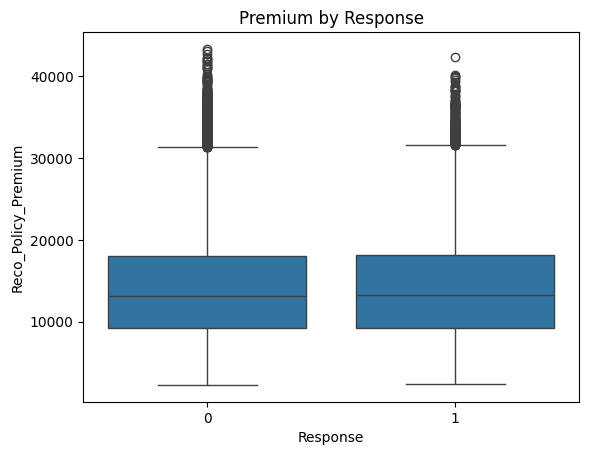

In [113]:
sns.boxplot(x='Response', y='Reco_Policy_Premium', data=train)
plt.title('Premium by Response')
plt.show()




/tmp/ipython-input-1911225734.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Age'] , color='b',shade=True,label='Negative')
/tmp/ipython-input-1911225734.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Age'] , color='r',shade=True, label='Positive')


Text(0.5, 1.0, 'Age VS. Response')

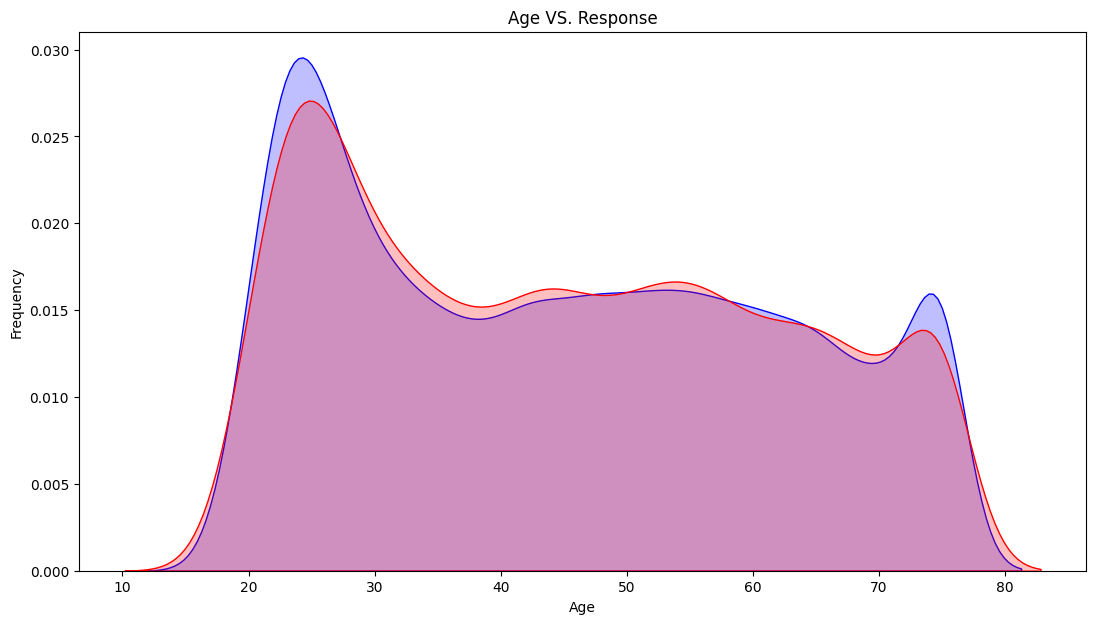

In [117]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Age'] , color='b',shade=True,label='Negative')
ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Age'] , color='r',shade=True, label='Positive')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age VS. Response')

/tmp/ipython-input-2798977066.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Negative')
/tmp/ipython-input-2798977066.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Positive')


Text(0.5, 1.0, 'Age VS. Response')

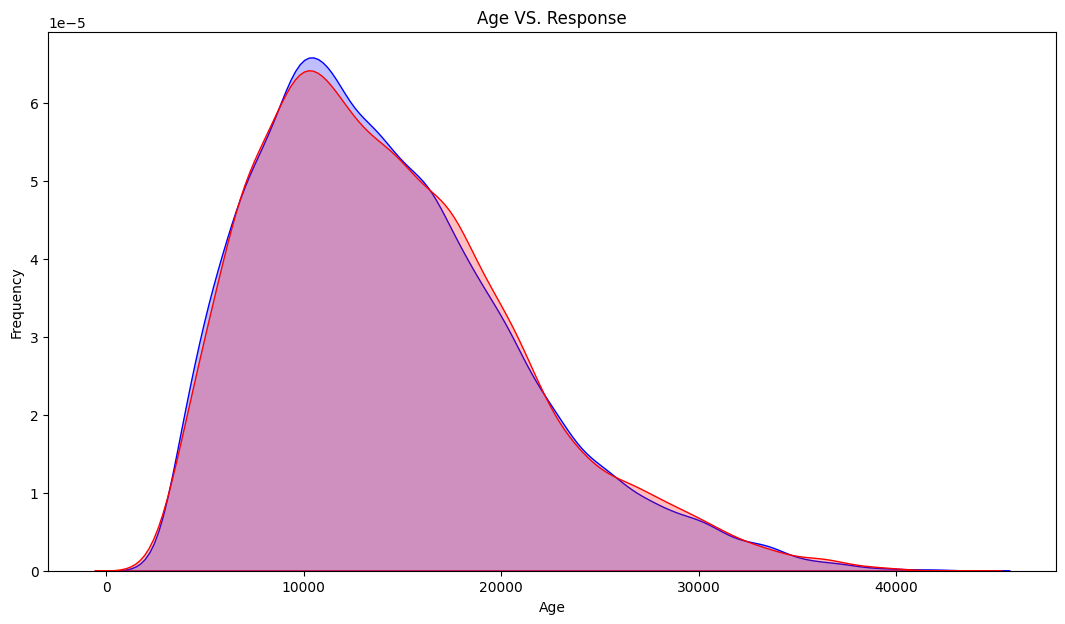

In [118]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Premium'] , color='b',shade=True,label='Negative')
ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Premium'] , color='r',shade=True, label='Positive')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age VS. Response')

/tmp/ipython-input-3544446848.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Cat'] , color='b',shade=True,label='Negative')
/tmp/ipython-input-3544446848.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Cat'] , color='r',shade=True, label='Positive')


Text(0.5, 1.0, 'Age VS. Response')

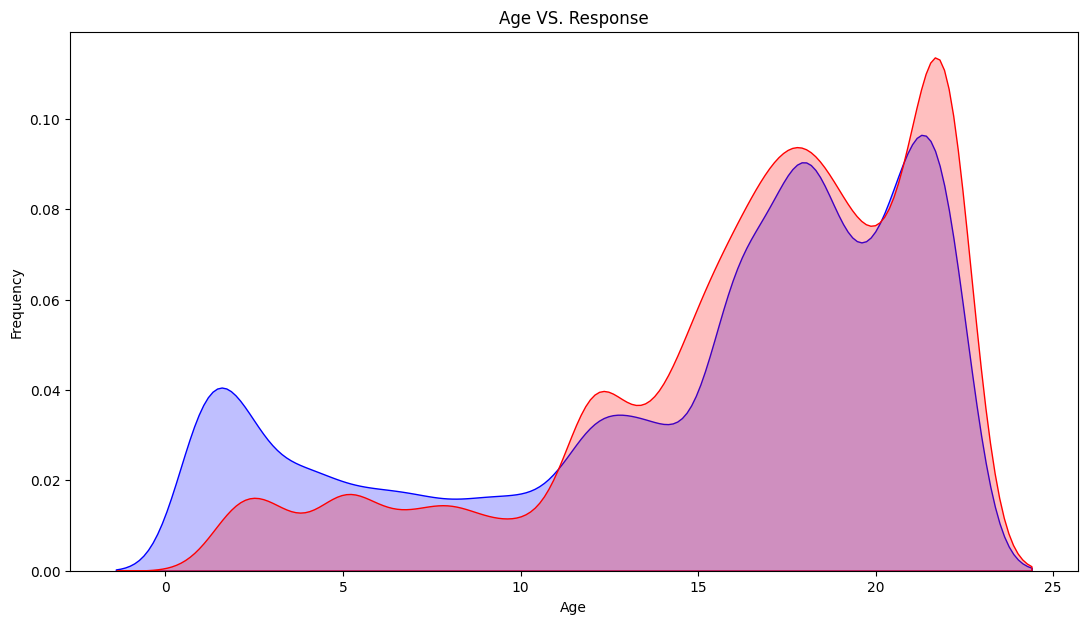

In [121]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(train.loc[(train['Response'] == 0),'Reco_Policy_Cat'] , color='b',shade=True,label='Negative')
ax=sns.kdeplot(train.loc[(train['Response'] == 1),'Reco_Policy_Cat'] , color='r',shade=True, label='Positive')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age VS. Response')

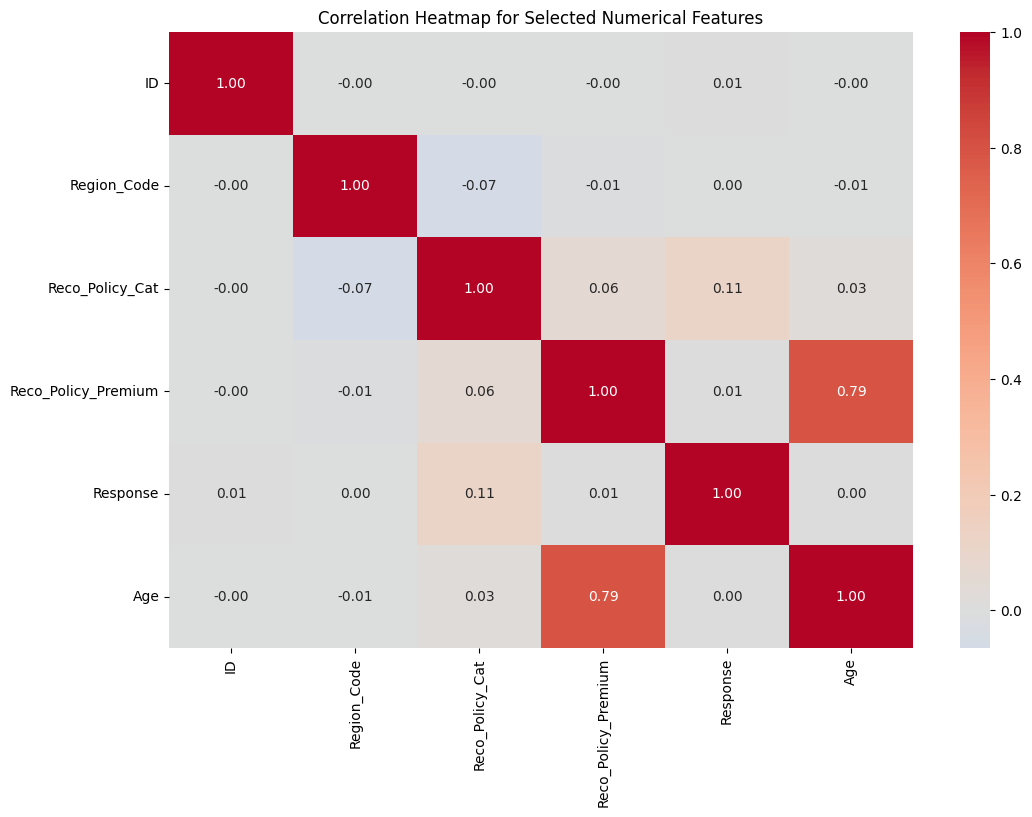

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['ID', 'City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response', 'Age']


numeric_cols = train[cols].select_dtypes(include=['number']).columns.tolist()


corr_matrix = train[numeric_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Selected Numerical Features')
plt.show()